<a href="https://colab.research.google.com/github/DrueStaples/Motion_Pictures_for_Patients/blob/master/MovieNight.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Welcome to your next mission! In a major city, a homeless/rehabilitation shelter has received a large number of movies and need your help to come up with a recommender system so the people only watch films that are positive.



---



##Every good craftsman needs the right set of tools! Follow these steps to get started!

1.   Import the packages 
2.   Download the dataset
3.   Split up the dataset for training and testing

In [1]:
import tensorflow as tf
from tensorflow import keras

import numpy as np

print(tf.__version__) #print 

1.13.1


In [2]:
#retrieve dataset from keras in which includes 50,000 movie reveiw!
imdb = keras.datasets.imdb

#split up the dataset into training and test data
(train_in, train_out), (test_in, test_out) = imdb.load_data(num_words=10000)

17465344/17464789 [==============================] - 0s 0us/step




---



##Explore the data

This will help you understand the data that you're working with



In [3]:
#display the length of the training inputs and their respective outputs

print(f'Training Inputs: {len(train_in)}, Training Outputs: {len(train_out)}')

Training Inputs: 25000, Training Outputs: 25000


In [4]:
#display a random movie review

print(train_in[92])

[1, 474, 66, 66, 473, 8, 67, 14, 20, 5, 4465, 18, 1928, 8, 79, 12, 143, 263, 2645, 964, 4573, 2650, 54, 12, 1177, 56, 11, 263, 2, 13, 3913, 12, 730, 83, 4, 288, 1799, 10, 10, 13, 16, 55, 1038, 685, 63, 11, 471, 93, 72, 1168, 637, 202, 101, 20, 6, 580, 60, 48, 13, 181, 8, 1135, 46, 7, 4, 750, 3534, 2, 13, 296, 12, 32, 4, 96, 143, 21, 161, 79, 233, 39, 12, 21, 4185, 10, 10, 4, 116, 16, 55, 55, 52, 21, 15, 16, 44, 12, 164, 9, 1852, 137, 75, 391, 15, 6269, 461, 4339, 5, 5273, 11, 6, 2, 3689, 7, 49, 243, 1106, 115, 348, 2618, 8, 27, 2, 137, 75, 391, 15, 29, 5, 7977, 989, 56, 174, 75, 92, 67, 12, 593, 42, 138, 12, 575, 315, 35, 2704, 19, 2, 1042, 7977, 2672, 15, 2708, 4563, 23, 90, 280, 21, 12, 16, 57, 194, 855, 13, 873, 8, 67, 14, 11, 2183, 21, 57, 164, 75, 82, 214, 4, 4199, 15, 7977, 16, 4, 31, 8, 721, 2, 8, 4, 1550, 21, 174, 75, 92, 67, 12, 10, 10, 13, 124, 49, 102, 26, 6, 2, 12, 17, 12, 2, 2857, 21, 14, 20, 1252, 2, 72, 125, 54, 6569, 2, 1233, 287, 56, 11, 4, 1333, 5, 517, 1113, 75, 92, 

^^ABOVE^^ : The review (words) is translated into numbers. The review always starts with 1.

In [5]:
#print out the amount of words there are in this review

len(train_in[92])

408

^^ABOVE^^ : This says the 92nd review is 408 words long!

In [6]:
#print out the amount the words there are in 3 random reviews

len(train_in[8]), len(train_in[155]), len(train_in[232])

(233, 194, 267)

^^ABOVE^^ : This says the 8th review is 233 words long, the 155th review is 194 words long, and the 232nd review is 267 words long. 



---



##Preprocess the data

1.   Convert the review (currently in integers) into words


          * Create a dictionary for converting
          * Create a function for converting


2.   Trim or pad the reviews to all be the same length



For us to read this easier, let's convert the review back into words

In [7]:
#What we're going to see is a cool way of decoding the review

#a dictionary mapping words to an integer index
decoder_map = imdb.get_word_index()

#The first indices are reserved
decoder_map = {k:(v+3) for k,v in decoder_map.items()} 
decoder_map['<PAD>'] = 0 #when scanning matrices to achieve a kernal, use 0 for padding
decoder_map['<START>'] = 1 #every review starts with 1
decoder_map['<UNK>'] = 2 #unknown
decoder_map['UNUSED'] = 3 #any word not within our range of most popular words gets a 3

decoder_map_dict = dict([(value,key) for (key,value) in decoder_map.items()]) #place your decoder within a dictionary

#create a function that takes your 'decoder_map_dict' and 
#translates it into words
def movie_decoder(text):
  return ' '.join([decoder_map_dict.get(i, '?') for i in text])

1646592/1641221 [==============================] - 0s 0us/step


Try out the function and see if you can translate a movie review into words!

In [8]:
movie_decoder(train_in[0])

#decode_review(train_in[0])

"<START> this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert <UNK> is an amazing actor and now the same being director <UNK> father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for <UNK> and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also <UNK> to the two little boy's that played the <UNK> of norman and paul they were just brilliant children are often left out of the <UNK> list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for wh

The arrays must be converted into tensors that are the SAME LENGTH via padding and trimming

In [0]:
train_in = keras.preprocessing.sequence.pad_sequences(train_in,
                                                        value=decoder_map["<PAD>"],
                                                        padding='post',
                                                        maxlen=256)

test_in = keras.preprocessing.sequence.pad_sequences(test_in,
                                                       value=decoder_map["<PAD>"],
                                                       padding='post',
                                                       maxlen=256)

Let's test to see if we were able to trim the data down so every movie review is the SAME LENGTH.

In [10]:
len(test_in[9]), len(train_in[85]), len(train_in[229])

(256, 256, 256)

Print out a review and notice this one isn't as long as 256 words. Therefore, we padded on zeros to make this review as long as our limit. 

In [11]:
print(test_in[39])

[   1   14  664   16  357    5  179  379   10   10   13  384    4  664
 3011  540  127   24   60  124   51   89    2 5986  495   12    9    6
 2604    5    4  403    9   43 1044  995  886    6 1170    2 3004  274
  100   28  579    4  664 3011   51    2   66    9    2    9    6   52
 2604   21  445   48   12    9  224   17 2420   10   10   82   50   16
   57  147 2314   11   14  664   43    2   49   84   57 2809    2    5
 8834  832   10   10    4  664   16   82  357   13  384   12  100   28
   77 1993  180    8 4480  234    5   95   12   62   28   77  775  128
   10   10   50   26    6  176  128 3672   74   14   14   16   24  290
  149   25   70   79  128 1618   39    2 1095   92  437  129  278    5
   58    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0 



---



##Build the model

Now that we cleaned up our data, let's configure, and compile a model that will train on our preprocessed data!

1.   Construct the model


          * print out a summary for better understanding




2.   Compile the model



In [12]:
#4 layer Neural Network 

#size of our vocabulary 

vocab_size = 10000


model = keras.Sequential([
    keras.layers.Embedding(vocab_size, 16), #useful for deriving the vectors (eg vocab_size) within 16 dimensional space to corrilate similarities. 
    keras.layers.GlobalAveragePooling1D(), #next we flatten the previous layer into a 1-D layer
    keras.layers.Dense(16, activation=tf.nn.relu), #the previous layer is then fed into a Dense layer with 16 nodes and a relu activation
    #relu returns num if positive and 0 if negative
    keras.layers.Dense(1, activation=tf.nn.sigmoid) #returns num if greater than threshold
])

model.summary()

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 16)          160000    
_________________________________________________________________
global_average_pooling1d (Gl (None, 16)                0         
_________________________________________________________________
dense (Dense)                (None, 16)                272       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 17        
Total params: 160,289
Trainable params: 160,289
Non-trainable params: 0
_________________________________________________________________


In [0]:
#compile the model with an optimizer, a loss, and metrics

model.compile(optimizer=tf.train.AdamOptimizer(),
             loss='binary_crossentropy',
             metrics=['accuracy'])

##Create a cross-validation set

We have our training set that we train on, but to really make sure it generlizes well to new data (test set), let's split up the data into another set (called the cross-validation set). 


In [0]:
validated_in = train_in[:10000]
cross_val_in = train_in[10000:]

validated_out = train_out[:10000]
cross_val_out = train_out[10000:]

##Train the model

Train 512 examples for 40 iterations 

In [15]:
model_behavior = model.fit(cross_val_in,
                          cross_val_out,
                          epochs=40,
                          batch_size=512,
                          validation_data=(validated_in, validated_out),
                          verbose=1)

Train on 15000 samples, validate on 10000 samples
Instructions for updating:
Use tf.cast instead.
Epoch 1/40
15000/15000 [==============================] - 1s 91us/sample - loss: 0.6914 - acc: 0.5809 - val_loss: 0.6887 - val_acc: 0.6538
Epoch 2/40
15000/15000 [==============================] - 0s 25us/sample - loss: 0.6836 - acc: 0.7329 - val_loss: 0.6784 - val_acc: 0.7412
Epoch 3/40
15000/15000 [==============================] - 0s 26us/sample - loss: 0.6679 - acc: 0.7645 - val_loss: 0.6594 - val_acc: 0.7642
Epoch 4/40
15000/15000 [==============================] - 0s 25us/sample - loss: 0.6421 - acc: 0.7707 - val_loss: 0.6307 - val_acc: 0.7695
Epoch 5/40
15000/15000 [==============================] - 0s 26us/sample - loss: 0.6058 - acc: 0.7997 - val_loss: 0.5940 - val_acc: 0.7937
Epoch 6/40
15000/15000 [==============================] - 0s 28us/sample - loss: 0.5619 - acc: 0.8195 - val_loss: 0.5529 - val_acc: 0.8087
Epoch 7/40
15000/15000 [==============================] - 0s 28us/sa

For our **training** set, we reached a loss of .31 and an accuracy of 88%!

##Evaluate the model

Let's see how the model performs by returning back two values: our loss and our accuracy. 

In [16]:
loss, accuracy = model.evaluate(test_in, test_out)

print(f'The loss of our test set is {loss}')
print(f'The accuracy of our test set is {accuracy}')


25000/25000 [==============================] - 2s 62us/sample - loss: 0.3322 - acc: 0.8710
The loss of our test set is 0.33217357233047484
The accuracy of our test set is 0.870959997177124


##Let's plot the data onto a graph to visually see how we did.



1.   Create a dictionary of the model's history via saving the keys into variables

          * Verify the keys of the dictionary are correct

2.   Plot the keys



In [17]:
import matplotlib.pyplot as plt


model_history_dict = model_behavior.history #dictionary
model_history_dict.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

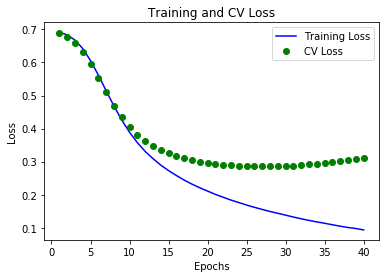

In [20]:
training_acc = model_history_dict['acc']
training_loss = model_history_dict['loss']
cv_acc = model_history_dict['val_acc']
cv_loss = model_history_dict['val_loss']

EPOCHS = range(1, len(training_acc) + 1)

plt.plot(EPOCHS, training_loss, 'b', label='Training Loss')
plt.plot(EPOCHS, cv_loss, 'go', label='CV Loss')
plt.title('Training and CV Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


^^ABOVE^^ :  The ideal loss is 0, but that is not the case. 


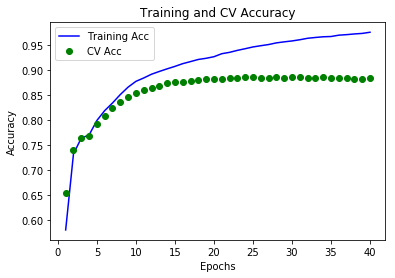

In [19]:
plt.clf()   # clear figure

plt.plot(EPOCHS, training_acc, 'b', label='Training Acc')
plt.plot(EPOCHS, cv_acc, 'go', label='CV Acc')
plt.title('Training and CV Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

^^ABOVE^^ The cross validated accuracy is expected not to be as good as the training due to overfitting.

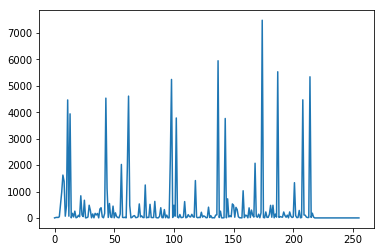

In [23]:
#just for fun
plt.plot(train_in[0]) #look at movie review 0 visually

#In conclusion, we were able predict a positive outcome of a movie with a loss of .31 and an accuracy of 87%! Thank you for all your help with this problem and I can't wait for our next mission!